# Read Data

In [1]:
import numpy as np

In [ ]:
import pandas as pd

df = pd.read_csv('../Dataset/dailyActivity_merged.csv')
dfmet = pd.read_csv('../Dataset/minuteMETsNarrow_merged.csv')

Set data type jadi time

In [ ]:
df['ActivityDate'] = pd.to_datetime(df['ActivityDate']).dt.date

Gabungkan dengan data MET, digroup menggunakan total dan mean.

In [ ]:
# Mengonversi kolom ActivityMinute ke format datetime dan ekstrak tanggalnya
dfmet['ActivityDate'] = pd.to_datetime(dfmet['ActivityMinute'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce').dt.date

daily_mets = dfmet.groupby(['Id', 'ActivityDate']).agg(
    Avg_METs=('METs', 'mean'),
    Total_MET=('METs', 'sum')
).reset_index()

df = pd.merge(df, daily_mets, on=['Id', 'ActivityDate'], how='left')

In [3]:
df.tail()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832
939,8877689391,5/12/2016,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,137,770,1849


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [5]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [6]:
def percent_null(series):
    total_nulls = (series.isnull() | (series == ' ')).sum()

    percent = (total_nulls / len(series)) * 100

    if percent == 0:
        return '0'
    else:
        return f'{percent:.2f}'

summary_data = []

for col in df.columns:
    column_summary = {
        'Column Name': col,
        '%null': str(percent_null(df[col]))+"%",
        'dtype': df[col].dtype,
        'count': df[col].count(),
        'nunique': df[col].nunique(),
        'mode': df[col].mode().values if not df[col].mode().empty else None,
        'unique value': list(df[col].value_counts().to_dict().keys())
    }
    summary_data.append(column_summary)
pd.DataFrame(summary_data)

,Column Name,%null,dtype,count,nunique,mode,unique value
0,Id,0%,int64,940,33,"[1503960366, 1624580081, 1844505072, 192797227...","[1503960366, 4319703577, 8583815059, 837856320..."
1,ActivityDate,0%,object,940,31,"[4/12/2016, 4/13/2016, 4/14/2016, 4/15/2016]","[4/12/2016, 4/14/2016, 4/15/2016, 4/13/2016, 4..."
2,TotalSteps,0%,int64,940,842,[0],"[0, 244, 6708, 9167, 6175, 10538, 1510, 8538, ..."
3,TotalDistance,0%,float64,940,615,[0.0],"[0.0, 2.59999990463257, 0.0099999997764825, 3...."
4,TrackerDistance,0%,float64,940,613,[0.0],"[0.0, 2.59999990463257, 0.0099999997764825, 3...."
5,LoggedActivitiesDistance,0%,float64,940,19,[0.0],"[0.0, 2.0921471118927, 2.25308108329773, 4.081..."
6,VeryActiveDistance,0%,float64,940,333,[0.0],"[0.0, 0.0700000002980232, 0.0599999986588955, ..."
7,ModeratelyActiveDistance,0%,float64,940,211,[0.0],"[0.0, 0.200000002980232, 0.280000001192093, 0...."
8,LightActiveDistance,0%,float64,940,491,[0.0],"[0.0, 4.17999982833862, 3.17000007629395, 4.88..."
9,SedentaryActiveDistance,0%,float64,940,9,[0.0],"[0.0, 0.0099999997764825, 0.0199999995529652, ..."


In [7]:
df = df.drop(columns='Id')

# Data Cleansing

## Handle duplicated data

In [9]:
print('Duplicate data:', len(df) - len(df.drop_duplicates()))

Duplicate data: 1


Membuang satu kolom duplikat.

In [10]:
df = df.drop_duplicates()

## Handle Missing Values

Seperti terlihat pada section sebelumnya, ada 0.64% null pada kolom Avg_MET dan Total_MET. Karene persentasenya sangat kecil, cukup gunakan median.

In [ ]:
df['Avg_METs'] = df['Avg_METs'].fillna(df['Avg_METs'].median())
df['Total_MET'] = df['Total_MET'].fillna(df['Total_MET'].median())

Cek lagi untuk memastikan

In [ ]:
str(percent_null(df['Avg_METs']))+"%", str(percent_null(df['Total_MET']))+"%"

('0%', '0%')

## Handle outliers

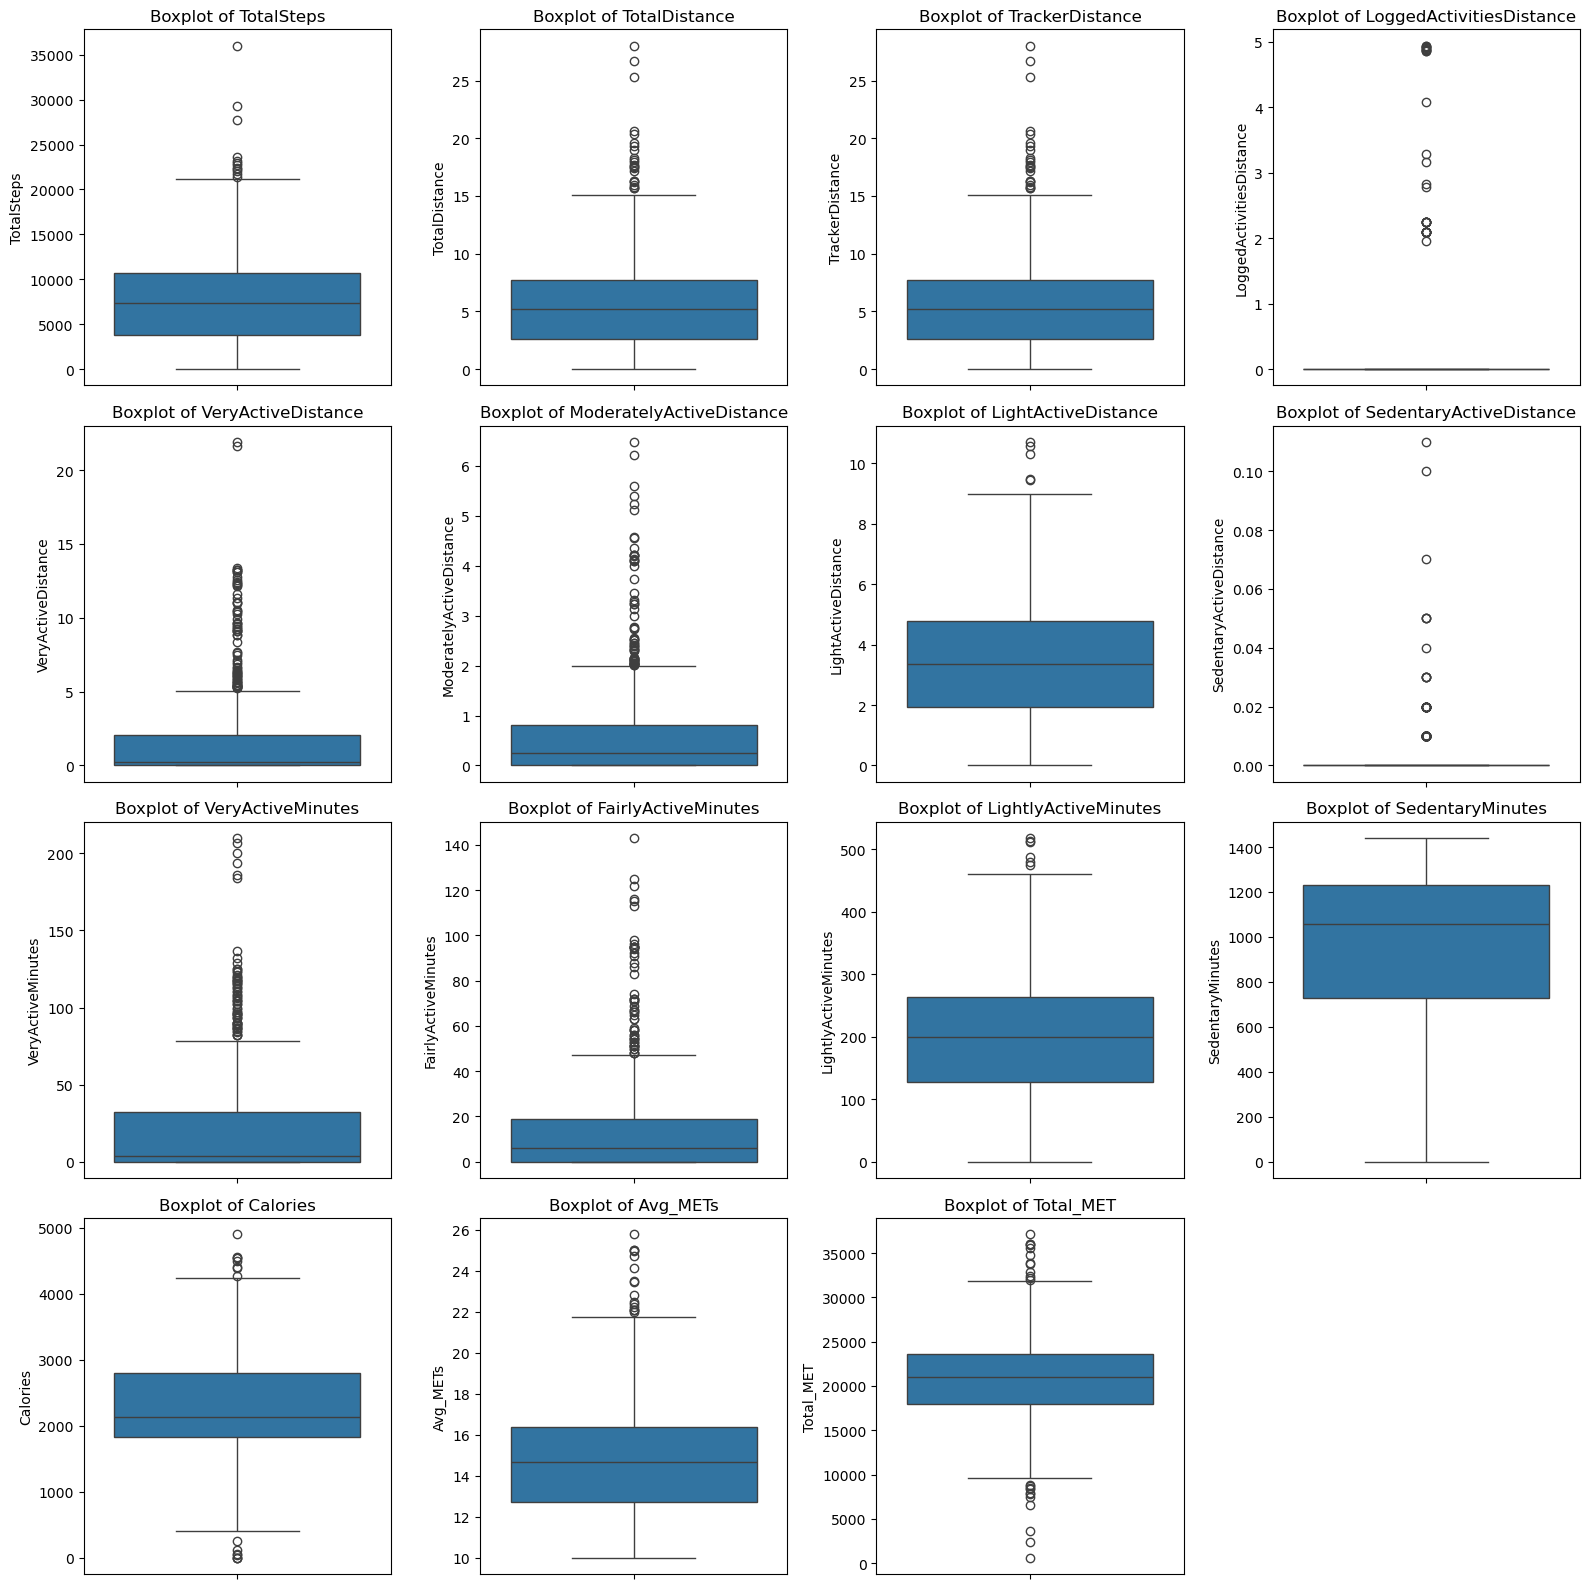

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(ncols=4, nrows=4,  figsize=(16,16))
axes = axes.flatten()
# Membuat boxplot untuk setiap kolom numerik
for i, col in enumerate(df.iloc[:, 1:].columns.tolist()):
    sns.boxplot(data=df, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")
    axes[i].set_xlabel('')

# Turn off remaining empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
# Menyesuaikan tata letak agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()

Data FitBit adalah data yang dicapture real-time menggunakan sebuah device. Anggapan bahwa tidak ada outlier karena pengguna FitBit beragam, mulai dari orang biasa yang jarang beraktivitas, hingga orang yang sangat aktif. Walaupun distribusi data menunjukkan banyaknya outlier, secar realnyaa itu bukan outlier tapi data asli.

#  Feature Engineering

## Feature extraction
### Ambil nama hari, tanggal, bulan, tahun, dan isweekend. Ambil juga distance per step.

In [29]:
df['ActivityDate'] = df['ActivityDate'].apply(pd.to_datetime)

In [30]:
df['DayOfWeek'] = df['ActivityDate'].dt.day_of_week # Monday=0, Sunday=6
df['Day'] = df['ActivityDate'].dt.day
df['Month'] = df['ActivityDate'].dt.month
df['Year'] = df['ActivityDate'].dt.year
df['is_weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x in [5, 6] else 0) 

In [31]:
df = df.drop(columns='ActivityDate')

### Distance Per Step

In [32]:
df['DistancePerStep'] = df.apply(lambda row: 0 if row['TotalSteps'] == 0 else row['TotalDistance'] / row['TotalSteps'], axis=1)

### Ambil cluster pakai gmm

Perlu discaling dulu karena range data agak berbeda jauh, terutama antara steps dan minutes.

Scaling untuk machine learning beda lagi, karena untuk machine learning itu scalingnya setelah data splitting agar tidak ada data leakage.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture

scaler_clustering = StandardScaler()

df_scaled_clustering = scaler_clustering.fit_transform(df[['TotalSteps', 'TotalDistance', 'VeryActiveDistance', 
                                                           'ModeratelyActiveDistance', 'LightActiveDistance', 
                                                           'SedentaryActiveDistance', 'VeryActiveMinutes', 
                                                           'FairlyActiveMinutes', 'LightlyActiveMinutes', 
                                                           'SedentaryMinutes', 'Avg_METs', 'Total_MET']])


#### Penentuan jumlah cluster yang optimal

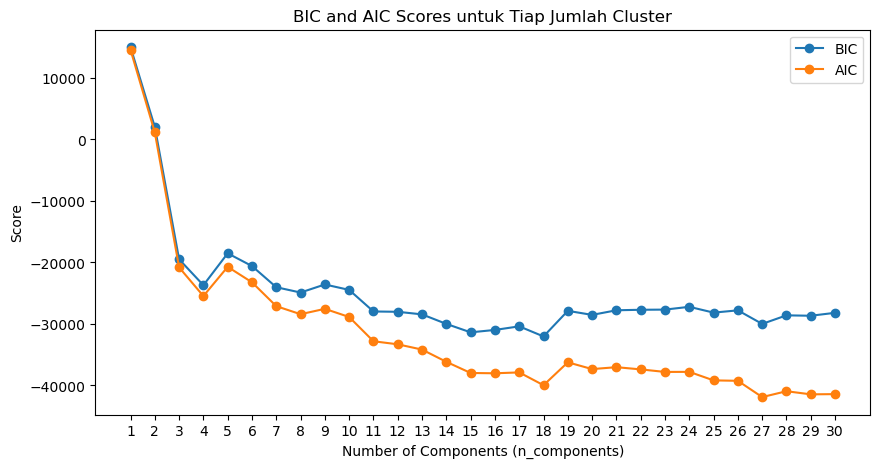

In [ ]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

n_components_range = range(1, 31)  # Uji sampai n_cluster = 30 
bic_scores = []
aic_scores = []

# Hitung BIC dan AIC untuk setiap jumlah cluster
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_scaled_clustering)  # Gunakan data yang sudah distandarisasi, ga pakai predict karena kita cuma perlu jumlah clusternya aja
    bic_scores.append(gmm.bic(df_scaled_clustering))
    aic_scores.append(gmm.aic(df_scaled_clustering))

# Plot BIC dan AIC untuk melihat jumlah cluster optimal
plt.figure(figsize=(10, 5))
plt.plot(n_components_range, bic_scores, label='BIC', marker='o')
plt.plot(n_components_range, aic_scores, label='AIC', marker='o')
plt.xlabel('Number of Components (n_components)')
plt.ylabel('Score')
plt.title('BIC and AIC Scores untuk Tiap Jumlah Cluster')
plt.legend()

plt.xticks(n_components_range)  # Menampilkan hanya integer pada sumbu-x
plt.show()


In [ ]:
# Menentukan jumlah cluster optimal (dengan BIC/AIC terendah)
optimal_n = n_components_range[np.argmin(bic_scores)]
print(f"Jumlah cluster optimal: {optimal_n}")

Jumlah cluster optimal: 18


Terlihat juga bahwa AIC dan BIC sama-sama rendah jika jumlah cluster ada 18.

#### Mulai Clustering

Clustering menggunakan GMM dengan hard assignment. Aslinya GMM ini menghasilkan cluster yang tumpang tindih, jadi tiap data itu bisa mempunyai lebih dari 1 Cluster. dengan hard assignment maka 1 data point punya 1 cluster.

In [ ]:
gmm = GaussianMixture(n_components=optimal_n, random_state=42)
df['Cluster'] = gmm.fit_predict(df_scaled_clustering)  # Hanya simpan label cluster

#### Cek apakah kita bisa mengurutkan Clusternya agar menjadi fitur Ordinal

##### Cek dengan Boxplot

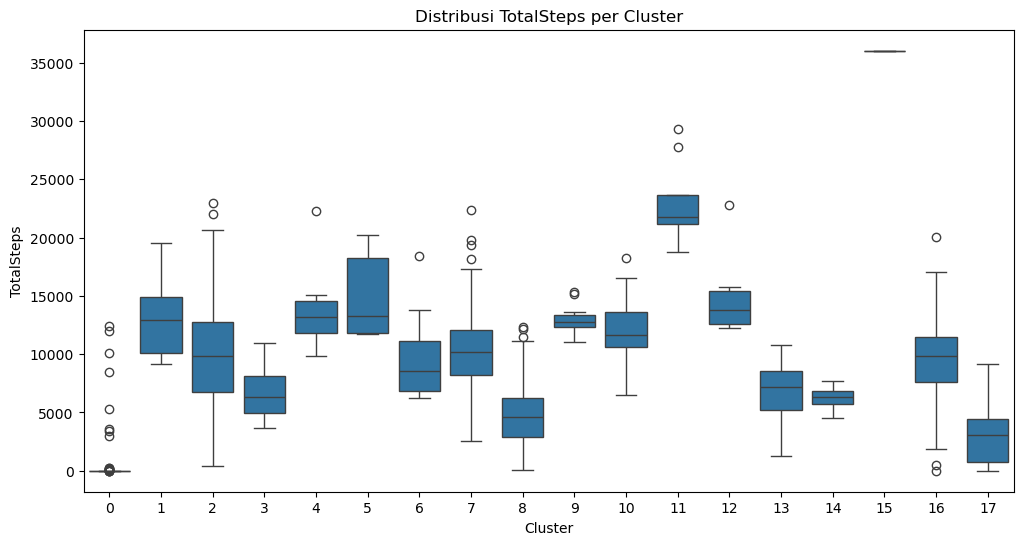

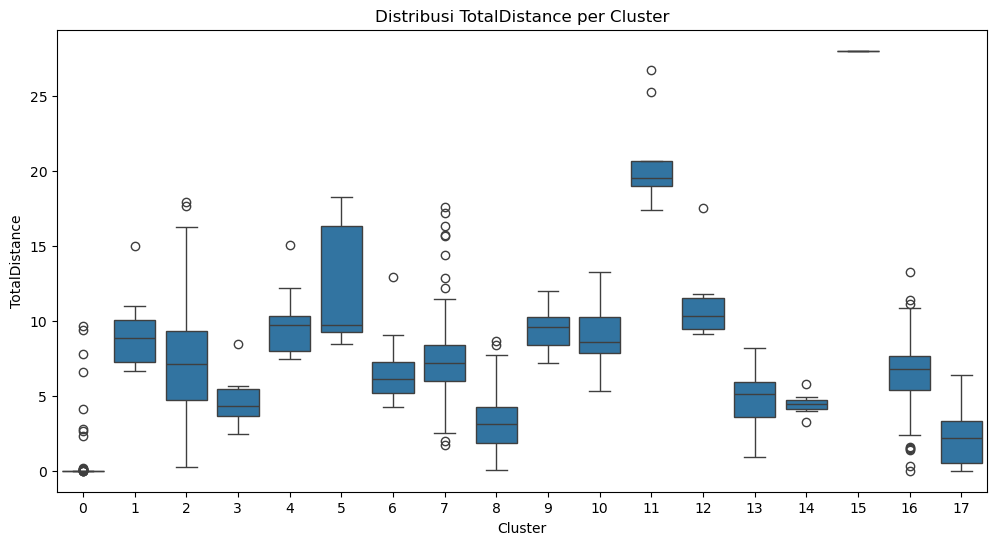

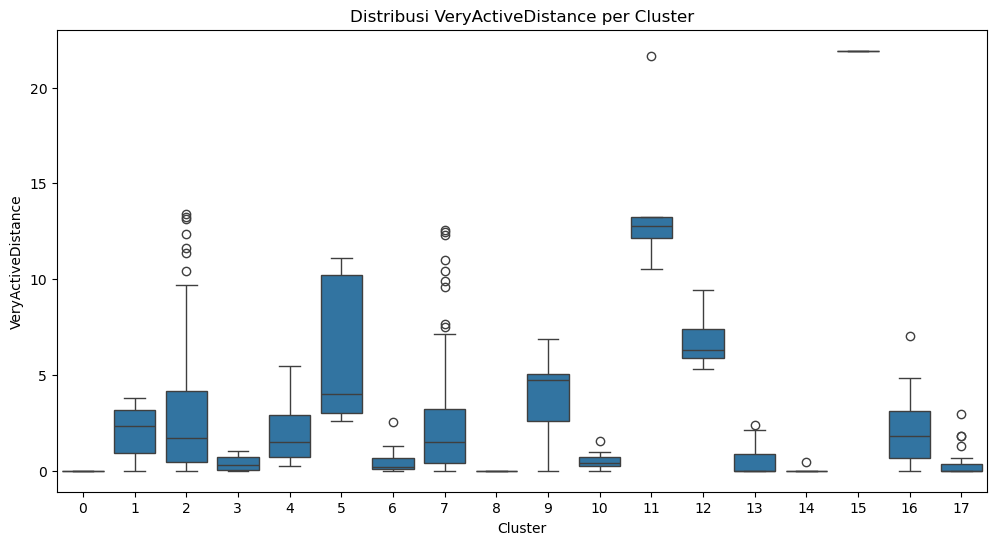

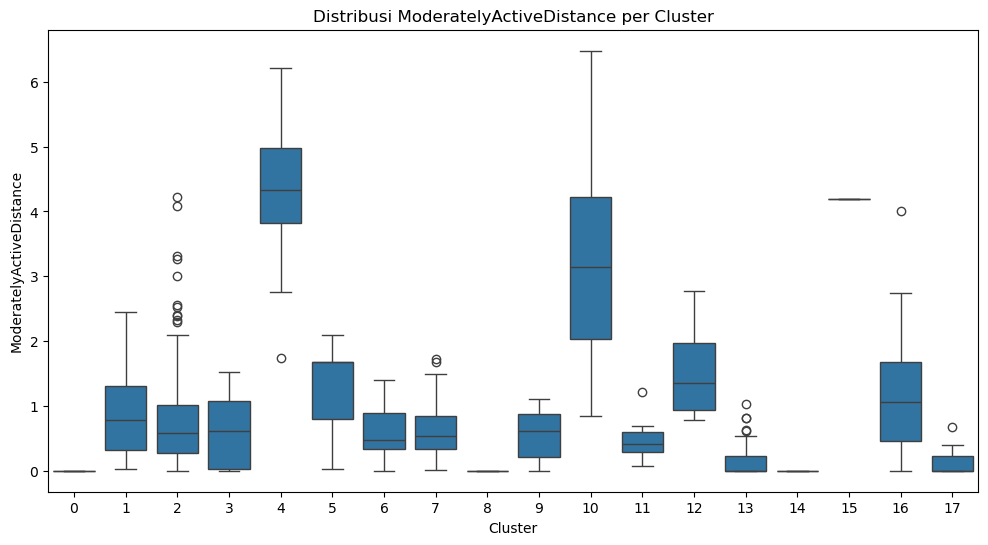

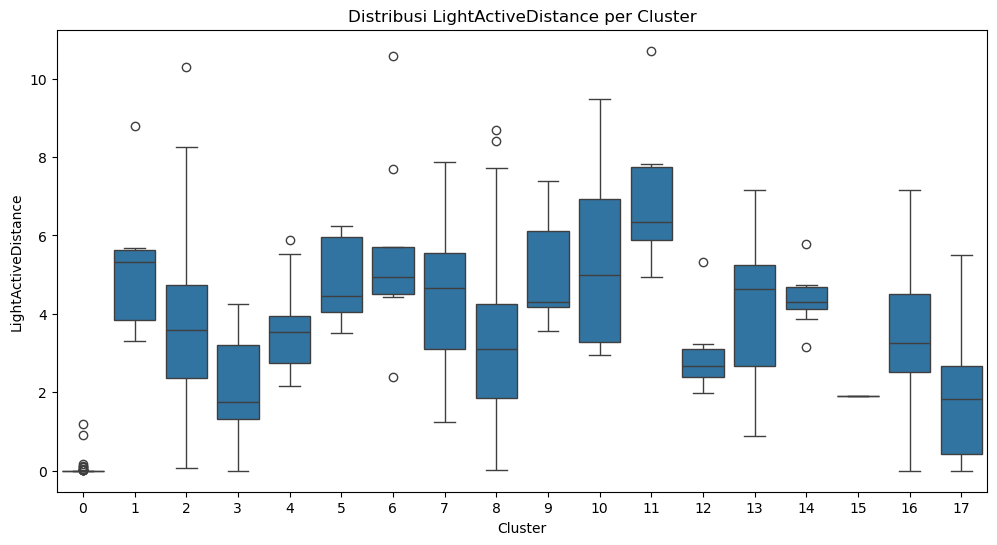

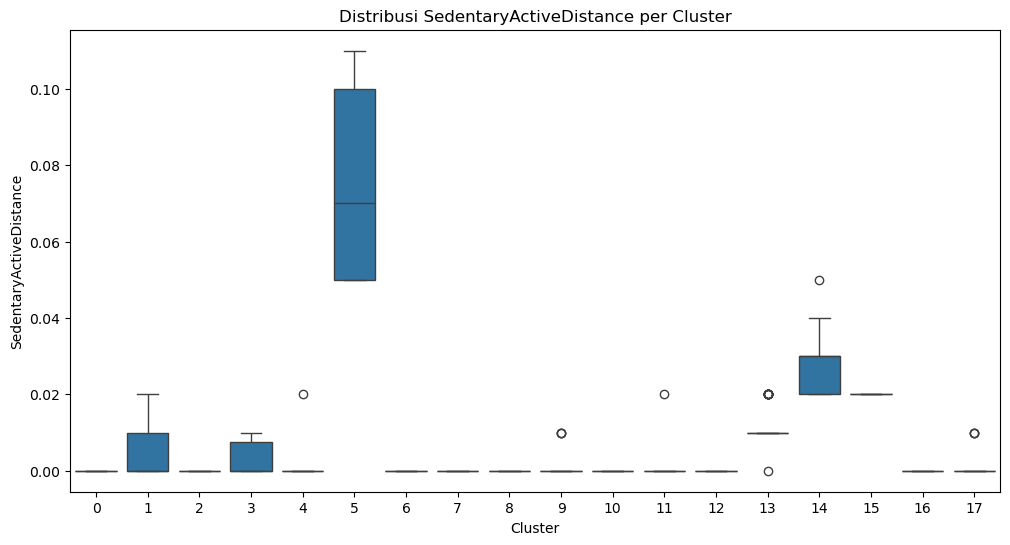

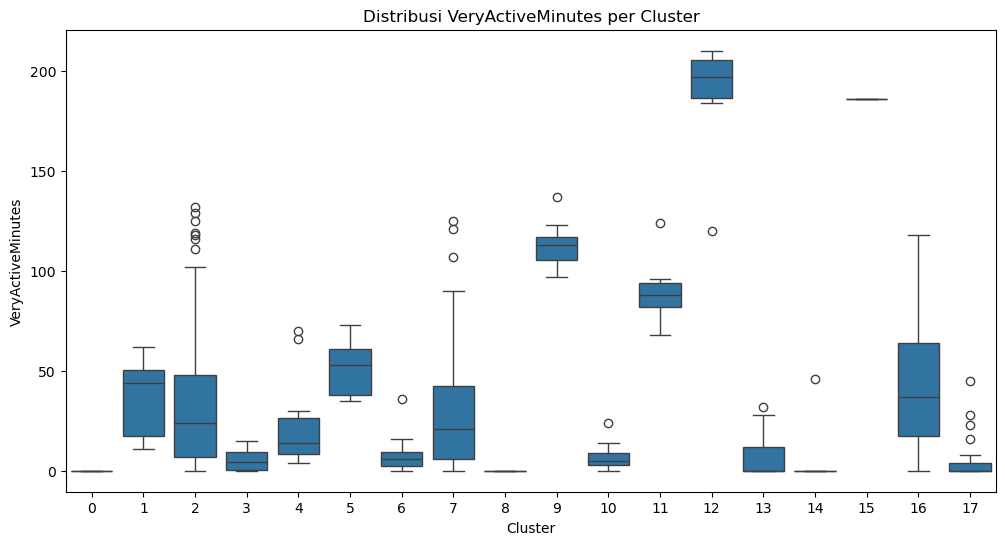

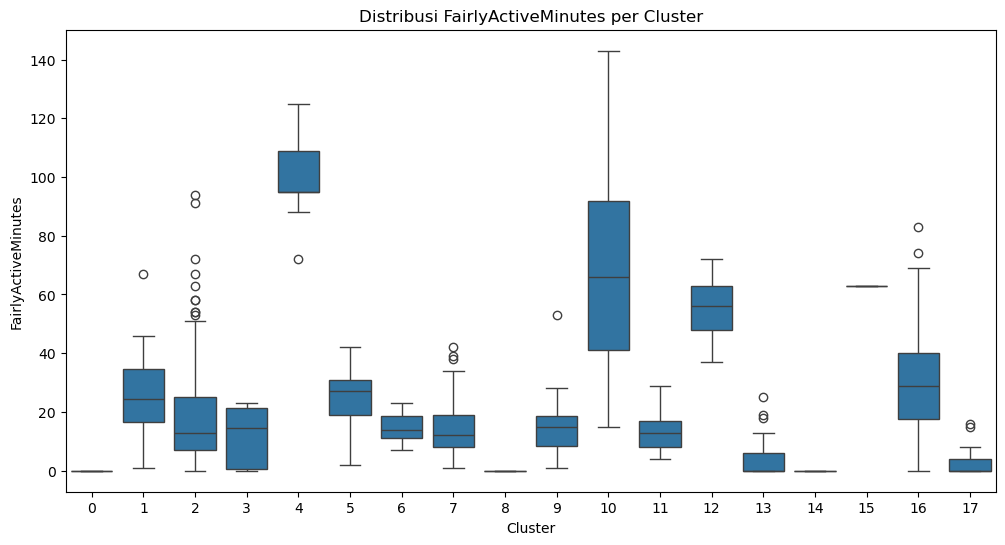

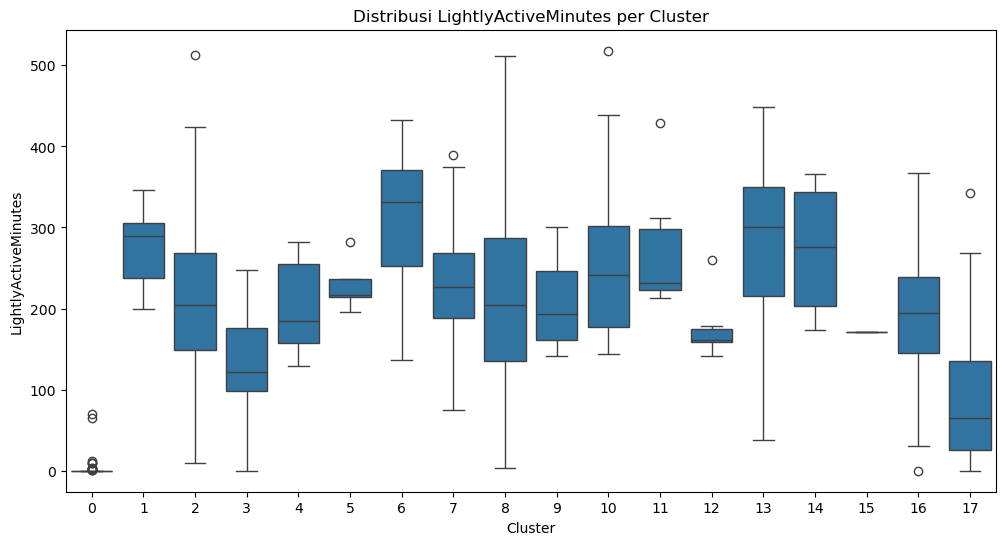

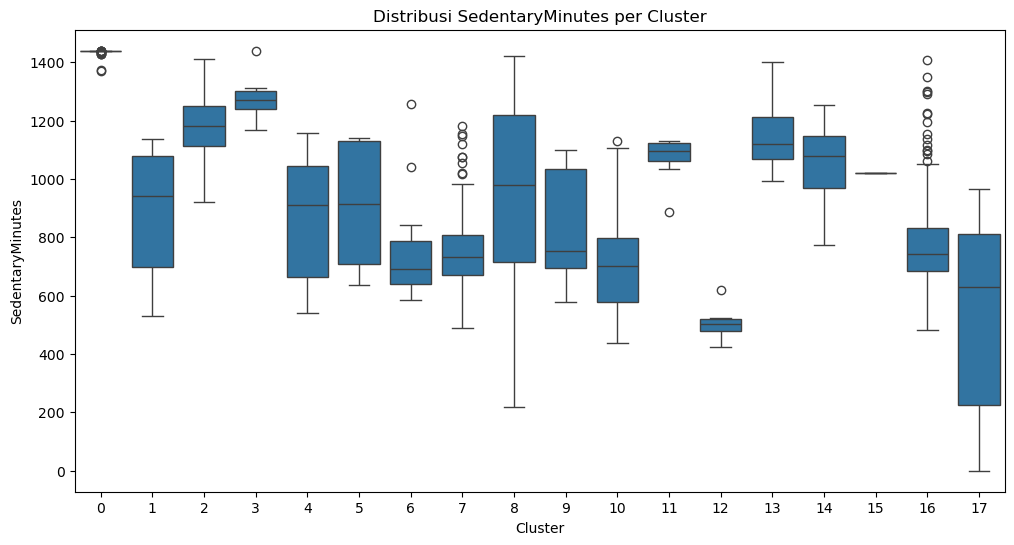

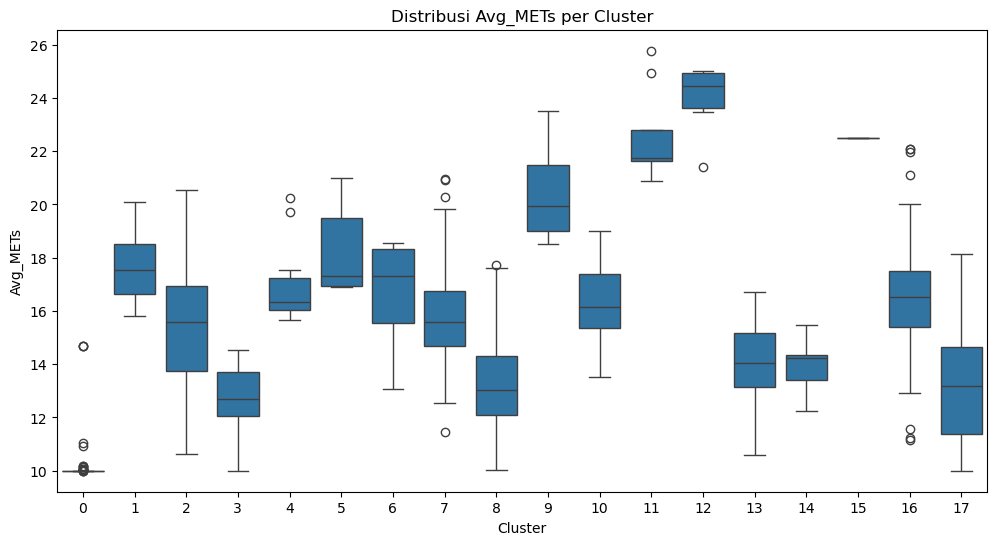

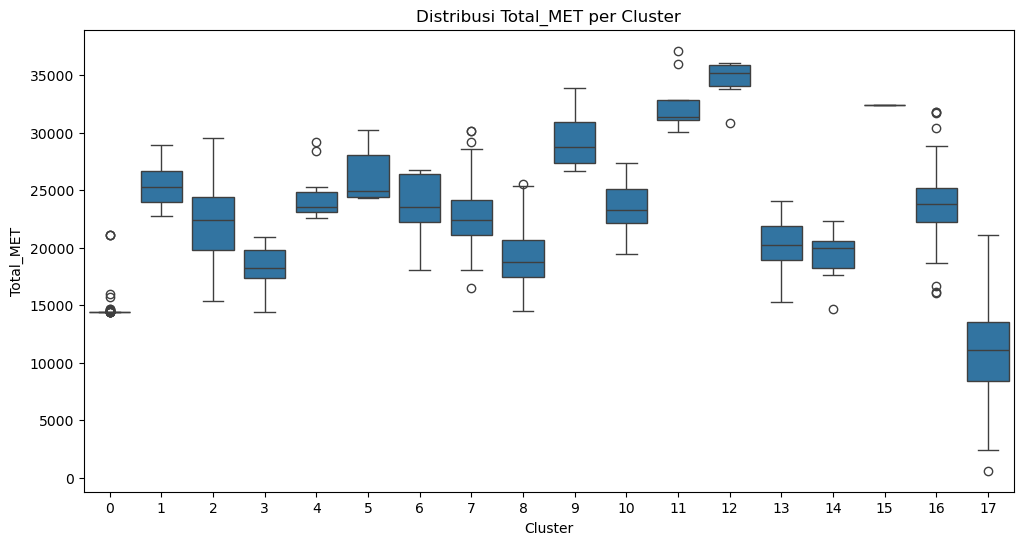

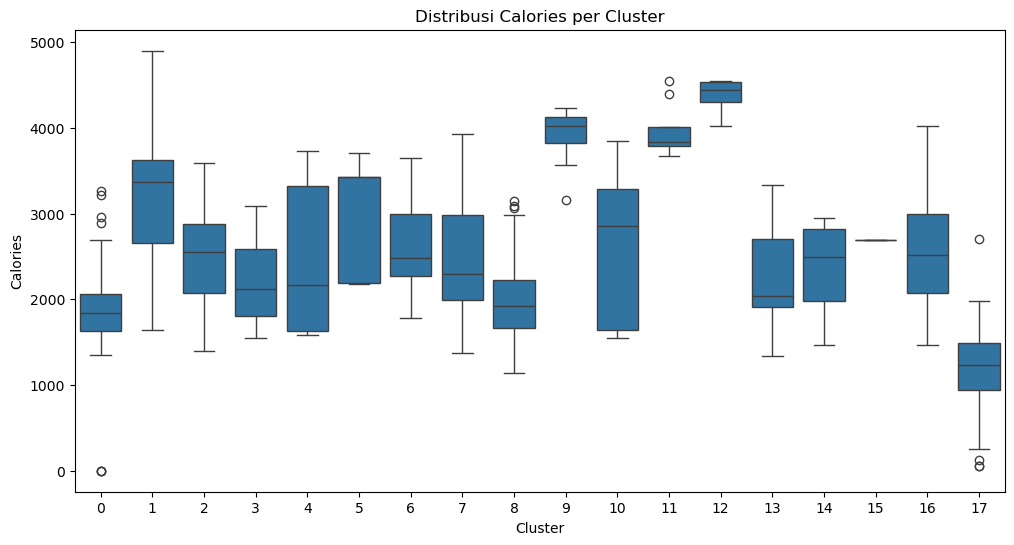

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar kolom yang akan divisualisasikan
columns_to_plot = [
    'TotalSteps', 'TotalDistance', 'VeryActiveDistance',
    'ModeratelyActiveDistance', 'LightActiveDistance',
    'SedentaryActiveDistance', 'VeryActiveMinutes',
    'FairlyActiveMinutes', 'LightlyActiveMinutes',
    'SedentaryMinutes', 'Avg_METs', 'Total_MET', 'Calories'
]

# Membuat boxplot untuk setiap kolom
for col in columns_to_plot:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=col, data=df)
    plt.title(f'Distribusi {col} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.show()



Tidak ditemukan pola yang jelas pada boxplot. Mungkin coba caara lain.

##### Cek dengan Heatmap

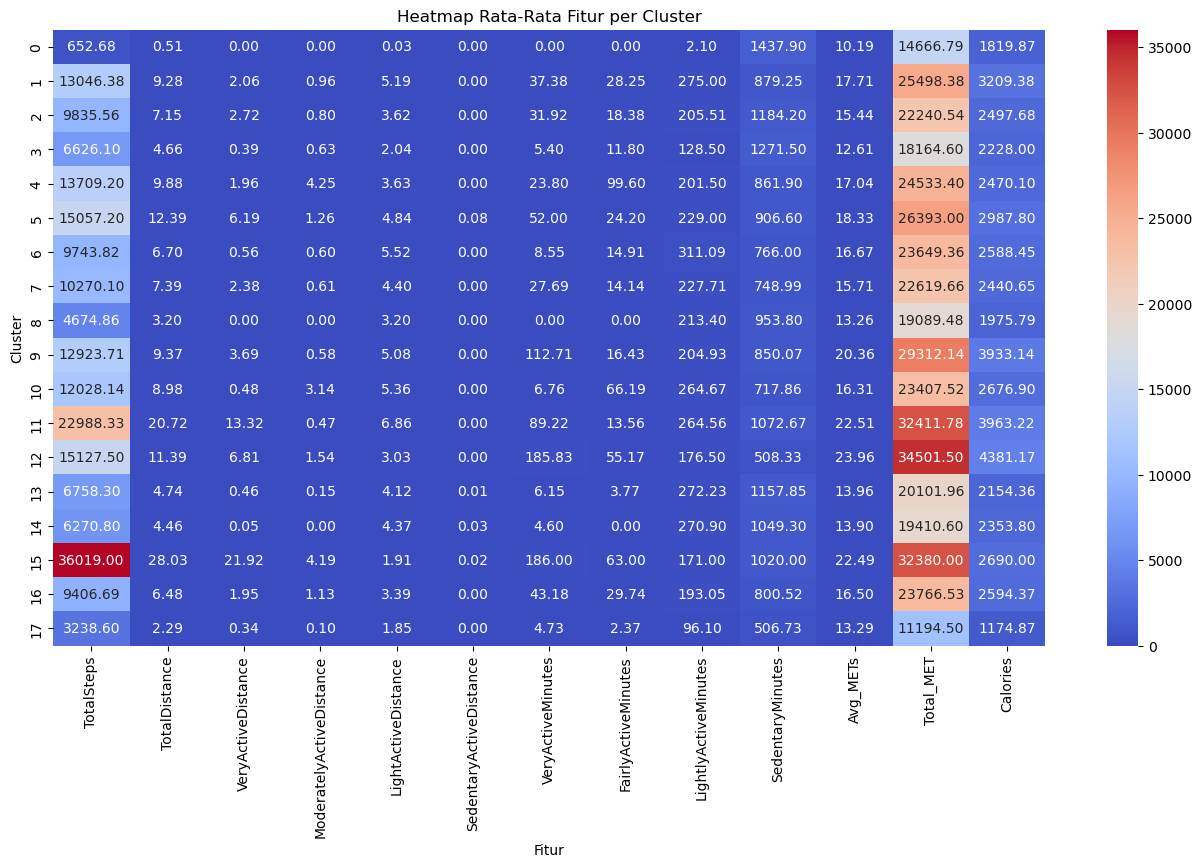

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menghitung rata-rata setiap fitur untuk setiap cluster
cluster_means = df.groupby('Cluster').mean()

# Membuat heatmap dari nilai rata-rata fitur
plt.figure(figsize=(16, 8))
sns.heatmap(cluster_means[columns_to_plot], annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Heatmap Rata-Rata Fitur per Cluster')
plt.xlabel('Fitur')
plt.ylabel('Cluster')
plt.show()


##### Mengurutkan Cluster

Karena pola yang terlihat jelas ada di Average TotalSteps dan Total_MET, mka akan kita urutkan berdasaarkan ini. Hasilnya msauk ke variabel ActivityRank.

In [ ]:
# Menghitung rata-rata Total Steps dan Total MET per cluster
cluster_means_df = df.groupby('Cluster')[['TotalSteps', 'Total_MET']].mean()

# Mengurutkan cluster berdasarkan rata-rata Total Steps dan Total MET secara descending -> Rank 1 paling aktif
sorted_clusters = cluster_means_df.sort_values(['TotalSteps', 'Total_MET'], ascending=[False, False]).index

# Membuat mapping dari urutan cluster ke peringkat aktivitas berdasarkan pengurutan sebelumnya
cluster_activity_rank = {cluster: rank for rank, cluster in enumerate(sorted_clusters, start=1)}

# Simpan di variabel
df['ActivityRank'] = df['Cluster'].map(cluster_activity_rank)

df.head()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,...,Avg_METs,Total_MET,DayOfWeek,Day,Month,Year,is_weekend,DistancePerStep,Cluster,Activity Rank
0,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,...,17.528472,25241.0,1,12,4,2016,0,0.000646,7,9
1,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,...,15.874306,22859.0,2,13,4,2016,0,0.000649,7,9
2,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,...,15.686806,22589.0,3,14,4,2016,0,0.000644,2,10
3,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,...,15.409722,22190.0,4,15,4,2016,0,0.000643,16,12
4,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,...,16.454167,23694.0,5,16,4,2016,1,0.000644,7,9


Cek urutannya

In [ ]:
pd.DataFrame(list(cluster_activity_rank.items()), columns=['Cluster', 'ActivityRank']).sort_values('Activity Rank').reset_index(drop=True)

,Cluster,Activity Rank
0,15,1
1,11,2
2,12,3
3,5,4
4,4,5
5,1,6
6,9,7
7,10,8
8,7,9
9,2,10


Karena ternyata clusternya bisa diurutkan, maka ambil yang ActivityRank, dan tidak menggunakan Cluster lagi. Hal ini untuk membuat machine learning mampu menangkap pola urutan yang ada pada data ini. Tapi kita coba cek dulu di feature selection, apakah skornya lebih tinggi daripada Cluster ataua tidak.

### Active Ratio, Sedentary Ratio, Active Total Calories Ratio, Intensity Level

In [ ]:
# Feature 1: Active Ratio (Total active minutes / 1440 minutes in a day)
df['ActiveRatio'] = (df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']) / 1440

# Feature 2: Sedentary Ratio (Sedentary minutes / 1440 minutes in a day)
df['SedentaryRatio'] = df['SedentaryMinutes'] / 1440

# Feature 3: Active to Calories Ratio (Total active minutes / Calories burned)
df['ActiveToCaloriesRatio'] = (df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']) / df['Calories']

# Feature 4: Intensity Level based on Total Steps (e.g., low: <5000, medium: 5000-10000, high: >10000 steps)
def intensity_level(steps):
    if steps < 5000:
        return 0
    elif steps <= 10000:
        return 1
    else:
        return 2

df['IntensityLevel'] = df['TotalSteps'].apply(intensity_level)

df.head()

### ActiveDistanceRatio: Rasio antara

In [34]:
df['ActiveDistanceRatio'] = (
    df['VeryActiveDistance'] + 
    df['ModeratelyActiveDistance'] + 
    df['LightActiveDistance']
) / df['TotalDistance']

df['ActiveDistanceRatio'] = df['ActiveDistanceRatio'].fillna(0.0)

In [ ]:
# Total Active Minutes
df['TotalActiveMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']
# Total Steps per Distance
df['StepsbyDistance'] = df['TotalSteps']/df['TotalDistance']
# Total Calories per Distance
df['CaloriesbyDistance'] = df['Calories']/df['TotalDistance']
# Active Time Ratio
df['ActiveTimeRatio'] = df['TotalActiveMinutes'] / (df['TotalActiveMinutes'] + df['SedentaryMinutes'])
# Distance Intensity Score
df['DistanceIntensity'] = (df['VeryActiveDistance'] * 3 + df['ModeratelyActiveDistance'] * 2 + df['LightActiveDistance'])

df.head()

<b> Membuat kolom baru yaitu pembagian kelompok berdasarkan total langkah harian <b><br>

Berdasarkan jurnal Revisiting "How Many Steps Are Enough?" oleh TUDOR-LOCKE, CATRINE1; HATANO, YOSHIRO3; PANGRAZI, ROBERT P.2; KANG, MINSOO4.

Diketahui dalam jurnal tersebut, pembagian langkah (steps) seringkali dikategorikan berdasarkan total langkah yang diambil dalam sehari. Berikut adalah pembagian umum yang sering digunakan berdasarkan total langkah:

Sedentary (Tidak Aktif): 0 - 4999 langkah <br>
Low Active (Aktif Rendah): 5000 - 7499 langkah <br>
Somewhat Active (Aktif Sedang): 7500 - 9999 langkah <br>
Active (Aktif): 10,000 - 12,499 langkah <br>
Highly Active (Sangat Aktif): 12,500 langkah ke atas

Pembagian ini membantu dalam memahami tingkat aktivitas fisik individu dan dapat digunakan untuk menetapkan tujuan aktivitas sehari-hari.

Maka akan dilakukan penambahan kolom tingkat aktif tidaknya berdasarkan total steps yang telah ditempuh pada hari tersebut

In [ ]:
def categorize_steps(steps):
    if steps < 5000:
        return 'Sedentary'
    elif 5000 <= steps < 7500:
        return 'Low Active'
    elif 7500 <= steps < 10000:
        return 'Somewhat Active'
    elif 10000 <= steps < 12500:
        return 'Active'
    else:
        return 'Highly Active'

group_order = ['Highly Active','Active','Somewhat Active','Low Active','Sedentary']
df['ActiveGroup'] = df['TotalSteps'].apply(categorize_steps)
df['ActiveGroup'] = pd.Categorical(df['ActiveGroup'], categories=group_order, ordered=True)
df

<b> Membuat kolom TotalMinutes <b>

In [ ]:
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']

<b> Membuat kolom ratio VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, dan SedentaryMinutes <b>

In [ ]:
# Step Intensity Ratios
df['VeryActiveRatio'] = df['VeryActiveMinutes'] / df ['TotalMinutes']
df['FairlyActiveRatio'] = df['FairlyActiveMinutes'] / df ['TotalMinutes']
df['LightlyActiveRatio'] = df['LightlyActiveMinutes'] / df ['TotalMinutes']
df['SedentaryRatio'] = df['SedentaryMinutes'] / df ['TotalMinutes']
df

<b> Menghitung calories per step <b>

In [ ]:
# Calories per Step
df['CaloriesPerStep'] = df['Calories'] / df['TotalSteps']
df

In [ ]:
#0. Menghitung jumlah total distance dan waktu aktif
df['TotalActiveDistance'] = df['VeryActiveDistance'] + df['ModeratelyActiveDistance'] + df['LightActiveDistance']
df['TotalActiveMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']

#1. Menghitung rasio aktivitas aktif terhadap total waktu aktif
df['ActiveRatio'] = df['TotalActiveMinutes'] / 1440 #(jumlah menit dalam satu hari)

#2. menghitung calories per menit
df['CaloriesPeractiveMinutes'] = df['Calories'] / df['TotalActiveMinutes']

#3. Menghitung rata-rata durasi aktif dari semua kategori
df['AverageActiveMinutes'] = df[['VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes']].mean(axis=1)

#4. Menghitung persentase kalori yang terbakar per jarak tempuh
df['CaloriesPerDistance'] = df['Calories'] / df['TotalDistance']

df[['ActiveRatio','CaloriesPeractiveMinutes','AverageActiveMinutes','CaloriesPerDistance']].head()

In [ ]:
# 1. ActivePercentage: (VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes) / Total minutes in a day (1440)
df['ActivePercentage'] = (df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']) / 1440 * 100

# 2. CaloriesPerStep: Calories burned per step (avoid division by zero)
df['CaloriesPerStep'] = df['Calories'] / df['TotalSteps'].replace(0, 1)

# 3. AveragePace: TotalDistance / (ActiveMinutes in hours)
df['TotalActiveMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']
df['AveragePace'] = df['TotalDistance'] / (df['TotalActiveMinutes'] / 60).replace(0, 1)  # convert minutes to hours

# 4. InactivePercentage: (SedentaryMinutes / Total minutes in a day) * 100
df['InactivePercentage'] = (df['SedentaryMinutes'] / 1440) * 100

df[['ActivePercentage', 'CaloriesPerStep', 'AveragePace', 'InactivePercentage']].head()


In [35]:
df.tail()

,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,...,Day,Month,Year,is_weekend,DistancePerStep,ActiveRatio,SedentaryRatio,ActiveToCaloriesRatio,IntensityLevel,ActiveDistanceRatio
923,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,...,8,5,2016,1,0.000759,0.184722,0.815278,0.093432,2,0.996301
924,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,...,9,5,2016,0,0.000902,0.214583,0.785417,0.083288,2,0.993973
925,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,...,10,5,2016,0,0.000759,0.175694,0.824306,0.089336,2,0.992638
926,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,...,11,5,2016,0,0.000913,0.217361,0.782639,0.081681,2,0.997955
927,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,23,1,...,12,5,2016,0,0.000759,0.111806,0.534722,0.087074,1,0.998366


# Fitur Tambahan yang belum ada di dataset

- Data jumlah kalori yang dikeluarkan per hari agar seseorang bisa hidup sehat.
- Goals dari tiap user (apakah olahraga untuk sehat/menurunkan berat badan/alasan lain).
- Data total steps per hari agar seseorang bisa hidup sehat.

## Feature encoding
Semua fitur sudah sekalian di encode saat feature extraction.

## Data Splitting
Data di split sebelum SelectKBest dan sebelum scaling agar menghindari data leakage.

In [36]:
X = df.drop(columns=['Calories'],inplace=False)
y = df['Calories']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Feature selection

In [38]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
scores = selector.scores_[selector.get_support()]

selected_features = pd.DataFrame({'Feature': selected_columns,
                                  'Mutual Information Score': scores
                    }).sort_values(by='Mutual Information Score', ascending=False).reset_index().drop(columns='index')

selected_features

,Feature,Mutual Information Score
0,DistancePerStep,0.644900
1,TotalDistance,0.635784
2,TrackerDistance,0.630838
3,TotalSteps,0.588584
4,ActiveToCaloriesRatio,0.569256
5,ActiveRatio,0.549045
6,SedentaryRatio,0.431825
7,SedentaryMinutes,0.412144
8,LightlyActiveMinutes,0.388903
9,VeryActiveMinutes,0.369350


Ternyata benar pada hipotesis di section sebelunya bahwa Activity Rank itu lebih bermanfaat dibandingkan hanya cluster saja. Maka fitur Cluster bisa di drop.

Ambil fitur yang scorenya diatas 0.1

In [ ]:
selected_features = selected_features[selected_features['Mutual Information Score'] > 0.1]['Feature'].tolist()
selected_features.remove('Cluster')
selected_features

In [40]:
X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train

,DistancePerStep,TotalDistance,TrackerDistance,TotalSteps,ActiveToCaloriesRatio,ActiveRatio,SedentaryRatio,SedentaryMinutes,LightlyActiveMinutes,VeryActiveMinutes,LightActiveDistance,IntensityLevel,VeryActiveDistance,ActiveDistanceRatio,FairlyActiveMinutes,ModeratelyActiveDistance
606,0.000755,7.110000,7.110000,9411,0.177795,0.318056,0.289583,417,458,0,7.11,1,0.00,1.000000,0,0.00
593,0.000000,0.000000,0.000000,0,0.000000,0.000000,1.000000,1440,0,0,0.00,0,0.00,0.000000,0,0.00
485,0.000661,5.350000,5.350000,8095,0.165393,0.255556,0.689583,993,340,18,4.51,1,0.59,1.000000,10,0.25
494,0.000661,3.460000,3.460000,5232,0.136808,0.175000,0.825000,1188,252,0,3.46,1,0.00,1.000000,0,0.00
751,0.000756,8.310000,8.310000,10988,0.072316,0.133333,0.585417,843,135,45,2.90,2,5.28,0.998797,12,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.000000,0.000000,0.000000,4,0.000742,0.000694,0.999306,1439,1,0,0.00,0,0.00,0.000000,0,0.00
270,0.000675,5.240000,5.240000,7762,0.168254,0.220833,0.779167,1122,311,1,4.89,1,0.07,1.000000,6,0.28
860,0.000780,6.610000,6.610000,8469,0.000000,0.000000,1.000000,1440,0,0,0.00,1,0.00,0.000000,0,0.00
435,0.000770,17.540001,17.540001,22770,0.108404,0.302778,0.352778,508,260,120,5.33,2,9.45,1.000570,56,2.77


In [41]:
X_test

,DistancePerStep,TotalDistance,TrackerDistance,TotalSteps,ActiveToCaloriesRatio,ActiveRatio,SedentaryRatio,SedentaryMinutes,LightlyActiveMinutes,VeryActiveMinutes,LightActiveDistance,IntensityLevel,VeryActiveDistance,ActiveDistanceRatio,FairlyActiveMinutes,ModeratelyActiveDistance
755,0.000665,7.10,7.10,10677,0.081294,0.143056,0.482639,695,147,32,3.25,2,2.31,0.998592,27,1.53
668,0.001111,0.01,0.01,9,0.000543,0.000694,0.999306,1439,1,0,0.01,0,0.00,1.000000,0,0.00
30,0.000650,5.31,5.31,8163,0.101955,0.101389,0.898611,1294,146,0,5.31,1,0.00,1.000000,0,0.00
388,0.000670,2.48,2.48,3702,0.018973,0.023611,0.878472,1265,34,0,0.35,0,0.00,0.141129,0,0.00
192,0.000620,4.48,4.48,7222,0.196161,0.227083,0.432639,623,327,0,4.48,1,0.00,1.000000,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.000769,7.75,7.75,10074,0.088245,0.181944,0.609722,878,234,19,6.03,2,1.29,1.000000,9,0.43
442,0.000672,1.99,1.99,2961,0.092601,0.134722,0.583333,840,194,0,1.99,0,0.00,1.000000,0,0.00
409,0.000588,0.01,0.01,17,0.007782,0.001389,0.000000,0,2,0,0.01,0,0.00,1.000000,0,0.00
408,0.000671,6.13,6.13,9129,0.148746,0.230556,0.398611,574,311,3,5.18,1,0.20,0.998369,18,0.74


# Feature Transformation

## StandardScaler

In [42]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))


In [43]:
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

In [50]:
pd.DataFrame(X_train_scaled, columns=selected_features).describe()

,DistancePerStep,TotalDistance,TrackerDistance,TotalSteps,ActiveToCaloriesRatio,ActiveRatio,SedentaryRatio,SedentaryMinutes,LightlyActiveMinutes,VeryActiveMinutes,LightActiveDistance,IntensityLevel,VeryActiveDistance,ActiveDistanceRatio,FairlyActiveMinutes,ModeratelyActiveDistance
count,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02,6.490000e+02
mean,-9.853443e-17,5.474135e-18,-1.286422e-16,6.842669e-17,2.463361e-16,-1.614870e-16,-2.189654e-17,2.737068e-17,3.010774e-17,-5.474135e-18,2.189654e-16,-2.737068e-17,-3.284481e-17,-3.284481e-16,5.474135e-17,-3.284481e-17
std,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00,1.000771e+00
min,-3.136164e+00,-1.404983e+00,-1.407971e+00,-1.499756e+00,-1.816318e+00,-1.855437e+00,-3.401380e+00,-3.401380e+00,-1.757954e+00,-6.660310e-01,-1.647635e+00,-1.210700e+00,-5.681004e-01,-3.073627e+00,-6.751174e-01,-6.429241e-01
25%,6.271150e-02,-7.187625e-01,-7.185969e-01,-7.464295e-01,-5.502696e-01,-6.571914e-01,-9.256120e-01,-9.256120e-01,-5.805898e-01,-6.660310e-01,-6.878017e-01,-1.210700e+00,-5.681004e-01,3.276163e-01,-6.751174e-01,-6.429241e-01
50%,1.316355e-01,-5.629574e-02,-5.308591e-02,-4.585758e-02,-2.630065e-02,1.582814e-01,2.378638e-01,2.378638e-01,8.689207e-02,-5.700599e-01,2.449593e-02,4.248070e-02,-5.103151e-01,3.371704e-01,-3.518779e-01,-3.548924e-01
75%,5.196489e-01,5.481061e-01,5.540933e-01,6.155017e-01,7.430807e-01,7.407619e-01,7.823976e-01,7.823976e-01,6.523976e-01,3.896518e-01,7.317419e-01,1.295661e+00,2.177796e-01,3.371704e-01,2.946012e-01,2.963097e-01
max,2.918145e+00,5.647252e+00,5.676671e+00,4.108255e+00,2.858784e+00,2.463240e+00,1.462219e+00,1.462219e+00,2.997855e+00,5.220201e+00,3.692071e+00,1.295661e+00,7.776097e+00,3.613604e-01,7.028758e+00,7.472056e+00


In [51]:
pd.DataFrame(X_test_scaled, columns=selected_features).describe()

,DistancePerStep,TotalDistance,TrackerDistance,TotalSteps,ActiveToCaloriesRatio,ActiveRatio,SedentaryRatio,SedentaryMinutes,LightlyActiveMinutes,VeryActiveMinutes,LightActiveDistance,IntensityLevel,VeryActiveDistance,ActiveDistanceRatio,FairlyActiveMinutes,ModeratelyActiveDistance
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000
mean,0.078875,0.142967,0.142341,0.149542,0.130403,0.143816,-0.150628,-0.150628,0.134175,-0.015560,0.161256,0.150281,0.016988,0.085388,0.177586,0.235175
std,0.877036,1.044380,1.044167,1.030254,0.974736,0.987048,0.991506,0.991506,1.005958,1.003873,1.053355,1.002588,1.048374,0.875166,1.221356,1.319866
min,-3.136164,-1.404983,-1.407971,-1.499756,-1.816318,-1.855437,-3.408145,-3.408145,-1.757954,-0.666031,-1.647635,-1.210700,-0.568100,-3.073627,-0.675117,-0.642924
25%,0.060971,-0.613190,-0.612539,-0.604739,-0.514249,-0.507411,-0.966198,-0.966198,-0.469343,-0.666031,-0.566559,-1.210700,-0.568100,0.329695,-0.675117,-0.642924
50%,0.131564,0.054555,0.058274,0.104525,0.040167,0.316383,0.038314,0.038314,0.133245,-0.506079,0.125531,0.042481,-0.437120,0.337170,-0.244131,-0.317323
75%,0.516897,0.703825,0.693294,0.761033,0.899608,0.828134,0.630199,0.630199,0.809997,0.309676,0.880769,1.295661,0.213927,0.337170,0.537031,0.515464
max,2.245444,5.993002,6.024010,5.780653,2.285349,2.637984,1.462219,1.462219,3.044208,6.051951,3.141429,1.295661,7.876258,0.357234,6.059040,7.133932


# Handle class imbalance

Tidak ada handling class imbalance karena ini kasus regression.